# Projeto Rede Metro SP
Rede de transporte metropolitano SP - O projeto do módulo 2 consiste em modelar a rede de transporte metropolitano de SP como um grafo!

<img src="img/Mapa.png" style="width:350px;" >

In [1]:
import numpy  as np
import pandas as pd 
from geopy.distance import geodesic
from numpy import genfromtxt
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "datasets\sp_transporte.json"
pathStations = "datasets\stations.json"
with open(path, mode="r", encoding="utf-8") as f:
    dataMetro = json.load(f)
with open(pathStations, mode="r", encoding="utf-8") as f:
    dataMetroStations = json.load(f)

JSONDecodeError: Expecting property name enclosed in double quotes: line 804 column 3 (char 17181)

In [7]:
dataMetro[4]

{'_estacaoId': 30,
 '_nome': 'Jabaquara',
 '_ordem': '01',
 '_linhaId': 1,
 '_linha': '1-Azul',
 '_tipoId': 1,
 '_tipo': 'Metrô'}

In [8]:
[ dataMetroStations['estacao-conceicao']['location']['latitude'],
dataMetroStations['estacao-conceicao']['location']['longitude'] ]

listaEstacoes = [  key for key, value in dataMetroStations.items() if 'linha-1-azul' in value['lines'] ] 
print(listaEstacoes)

NameError: name 'dataMetroStations' is not defined

In [9]:
listaEstacoes = [  key for key, value in dataMetroStations.items() if 'linha-2-verde' in value['lines'] ] 
print(listaEstacoes)

NameError: name 'dataMetroStations' is not defined

In [10]:
madalena = [dataMetroStations['estacao-vila-madalena']['location']['latitude'], dataMetroStations['estacao-vila-madalena']['location']['longitude']]
d = {}
for st in listaEstacoes:
    s = [dataMetroStations[st]['location']['latitude'], dataMetroStations[st]['location']['longitude']]
    disMadalena = geodesic(madalena, s).kilometers
    d[st] = disMadalena
print(d)
for item in sorted(d, key = d.get):
    print (item)
    

NameError: name 'dataMetroStations' is not defined

In [11]:
jabaquara = [dataMetroStations['estacao-jabaquara']['location']['latitude'], dataMetroStations['estacao-jabaquara']['location']['longitude']]
conceicao = [dataMetroStations['estacao-conceicao']['location']['latitude'],dataMetroStations['estacao-jabaquara']['location']['longitude']]
sao-judas = [dataMetroStations['estacao-sao-judas']['location']['latitude'], dataMetroStations['estacao-sao-judas']['location']['longitude']]
saude = [dataMetroStations['estacao-saude']['location']['latitude'],dataMetroStations['estacao-saude']['location']['longitude']]
print(geodesic(jabaquara, conceicao).kilometers)
print(geodesic(sao-judas, saude).kilometers)

SyntaxError: cannot assign to operator (<ipython-input-11-41c6af6c6352>, line 3)

In [ ]:
for m in dataMetro:
    pos = list(zip(df.longitude,df.latitude))
    dict_pos = dict(zip(df.cluster_label,df.pos))

In [9]:
path =path = "datasets\Projeto_linhas.xlsx"
df = pd.read_excel(path, sheet_name='Linhas')
df.shape
df

,ordem,Tempo Medio,estacao,linha,tipo,lat,long
0,1,0.0,tucuruvi,1 - Azul,Metro,-23.480494,-4.660372e+01
1,2,2.0,paradainglesa,1 - Azul,Metro,-23.486749,-4.660886e+01
2,3,2.0,jardimsaopaulo-ayrtonsenna,1 - Azul,Metro,-23.492054,-4.661666e+01
3,4,2.0,santana,1 - Azul,Metro,-23.502381,-4.662469e+01
4,5,1.0,carandiru,1 - Azul,Metro,-23.509084,-4.662489e+01
...,...,...,...,...,...,...,...
210,2,NaN,jandira,Corredor - C,EMTU,-23.528226,-4.690284e+01
211,3,NaN,carapicuiba,Corredor - C,EMTU,-23.516992,-4.683542e+01
212,4,NaN,generalmiguelcosta,Corredor - C,EMTU,-23.520824,-4.681551e+01
213,5,NaN,amadoraguiar,Corredor - C,EMTU,-23.547064,-4.676040e+01


In [10]:
G = nx.DiGraph()

In [11]:
import matplotlib.pyplot as plt

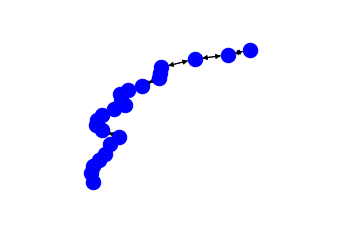

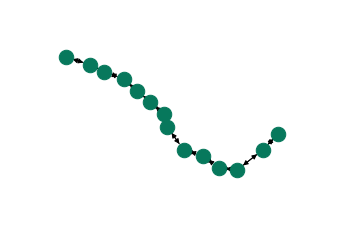

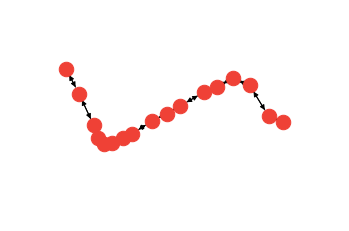

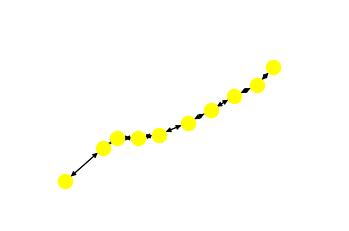

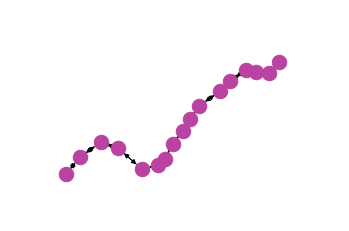

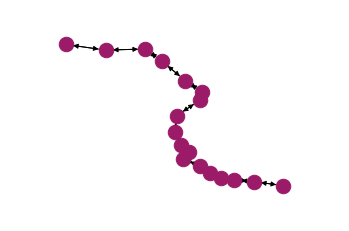

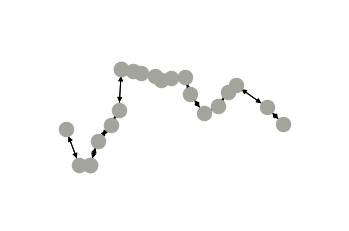

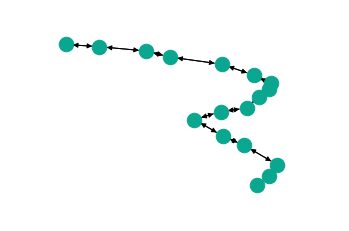

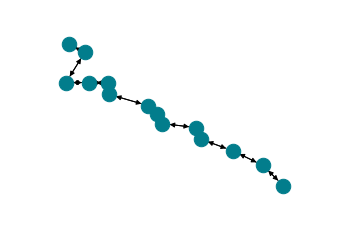

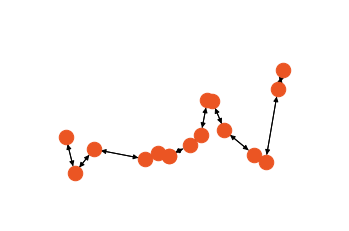

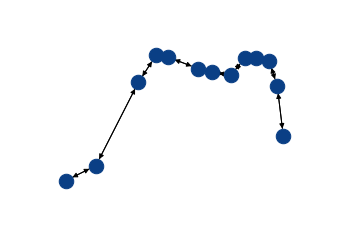

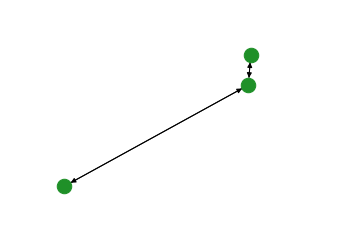

KeyboardInterrupt: 

In [7]:
dic_grafos = {}
dic_grafos_pos = {}
dic_conexoes = {}

for estacao in df.values:
    G.add_node(estacao[3])
    dic_grafos_pos[estacao[3]] ={}

for linha in df['linha'].unique().tolist():
    g = nx.DiGraph()
    listEst = df[df['linha']==linha]['estacao'].unique().tolist()
    g.add_nodes_from(listEst)
    for cnt in range(len(listEst)-1):
        # print(listEst[cnt])
        # print(listEst[cnt+1])
        g.add_edge(listEst[cnt], listEst[cnt+1])
        g.add_edge(listEst[cnt+1], listEst[cnt])
    dic_grafos[linha] = g 
    
        #g.add_edge(listEst[cnt], listEst[cnt+1]) 

for linha in df['linha'].unique().tolist():
    listEst = df[df['linha']==linha]['estacao'].unique().tolist()
    df_e = df[df['linha']==linha]
    for cnt, e in df_e.iterrows():
        dic_grafos_pos[linha][e['estacao']] =  [ e['long'], e['lat']]

# print(dic_grafos['1 - Azul'])
# g = dic_grafos['1 - Azul']
# pos = dic_grafos_pos['1 - Azul']
# print(pos)
# # top = nx.bipartite.sets(g)[0]
# # pos = nx.bipartite_layout(g, top)
# nx.draw_networkx(g, pos=pos, node_color="blue", node_size=210, font_color='gray')
# # Set margins for the axes so that nodes aren't clipped
# ax = plt.gca()
# ax.margins(0.20)
# plt.axis("off")
# plt.show()
# print(dic_grafos['2 - Verde'])
# g = dic_grafos['2 - Verde']
# pos = dic_grafos_pos['2 - Verde']
# print(pos)
# # top = nx.bipartite.sets(g)[0]
# # pos = nx.bipartite_layout(g, top)
# nx.draw_networkx(g, pos=pos, node_color="green", node_size=210, font_color='gray')
# # Set margins for the axes so that nodes aren't clipped
# ax = plt.gca()
# ax.margins(0.20)
# plt.axis("off")
# plt.show()
def replace_words(s, words):
    for k, v in words.items():
        s = s.replace(k, v)
    return s

def plotLine(nomeLinha):
    colordict = {'1 - Azul': 'blue',
                 '2 - Verde':'#07785c',
                 '3 - Vermelha':'#ef4136',
                 '4 - Amarela':'yellow',
                 '5 - Lilas':'#ba43a1',
                 '7 - Rubi':'#9b1b68',
                 '8 - Cinza':'#a3a49c',
                 '9 - Esmeralda':'#0aa690',
                 '10 - Turquesa':'#027d8c',
                 '11 - Coral':'#eb5523',
                 '12 - Safira':'#0a3f85',
                 '13 - Jade':'#1f9028',
                 '15 - Prata':'#8a8e8a',
                 'Corredor - A':'blue',
                 'Corredor - B':'blue',
                'Corredor - C':'blue'
}
    coltable = replace_words(nomeLinha,colordict)
    #print(dic_grafos[nomeLinha])
    g = dic_grafos[nomeLinha]
    pos = dic_grafos_pos[nomeLinha]
    # print(pos)
    # top = nx.bipartite.sets(g)[0]
    # pos = nx.bipartite_layout(g, top)
    #nx.draw_networkx_labels(g, label_pos=, pos=pos, rotation='vertical')
    nx.draw_networkx(g, pos=pos, node_color=coltable, node_size=210, font_color='gray',with_labels=False)
    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()
    plt.title(nomeLinha)
for linha in df['linha'].unique().tolist():
    plotLine(linha)




In [106]:
def replace_words(s, words):
    for k, v in words.items():
        s = s.replace(k, v)
    return s

s = 'hello world'
dictionary = {"hello": "foo", "world": "bar"}

print (replace_words(s, dictionary))

foo bar


In [107]:
pontes_inter_reg = {# sul 
                    "bras" : ["3 - Vermelha SP","10 - Turquesa","11 - Coral"],
                    # centro oeste
                    "se" : [],
                    "luz" : ["RO AM PA TO"]}

In [108]:
metroSP = nx.DiGraph()

# compondo regioes
for g in dic_grafos.values():
    
    metroSP = nx.compose(metroSP, g)



In [109]:
dic_grafos_pos['1 - Azul']

{'tucuruvi': [-46.60371511490736, -23.480493736870734],
 'paradainglesa': [-46.6088620198399, -23.48674869713601],
 'jardimsaopaulo-ayrtonsenna': [-46.6166628790903, -23.49205400654396],
 'santana': [-46.62468876570826, -23.502381155024448],
 'carandiru': [-46.62489350827157, -23.50908382253165],
 'portuguesa-tiete': [-46.62514205361116, -23.515706771521785],
 'armênia': [-46.629194895807935, -23.525022098363056],
 'tiradentes': [-46.63245646204424, -23.53045207544361],
 'luz': [-46.63433800200162, -23.535954738266224],
 'saobento': [-46.6342307136447, -23.54396124312118],
 'se': [-46.63336133226828, -23.54968875231142],
 'japao-liberdade': [-46.6357611415682, -23.55491557024238],
 'saojoaquim': [-46.63866617398181, -23.5615314974739],
 'vergueiro': [-46.6398623231886, -23.56842302591753],
 'paraiso': [-46.6401841882917, -23.574480550990646],
 'anarosa': [-46.63874652428546, -23.581147438802645],
 'vilamariana': [-46.63456227826996, -23.58895454366357],
 'santacruz': [-46.6369226221303

In [110]:
dic_grafos_pos_total = {}
    # compondo regioes
for g in dic_grafos_pos.values():
    dic_grafos_pos_total.update(g)

In [3]:
    # pos = dic_grafos_pos[nomeLinha]
    # print(pos)
    # top = nx.bipartite.sets(g)[0]
    # pos = nx.bipartite_layout(g, top)
    #nx.draw_networkx_labels(g, label_pos=, pos=pos, rotation='vertical')
   
    # print(dic_grafos_pos_total)
    nx.draw_networkx(metroSP, pos=dic_grafos_pos_total, node_color='blue', node_size=20, font_color='gray',with_labels=True)
    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    
    ax.margins(0.20)
    fig= plt.gcf()
    fig.set_size_inches(40, 20.5)
    plt.axis("off")
    plt.show()

NameError: name 'metroSP' is not defined